In [1]:
import jupyter_black
jupyter_black.load()

## AdaBoosting, Gradientboosting, XGBoosting Regressor

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (7, 4)

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)

In [3]:
df = pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().any().any()

False

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


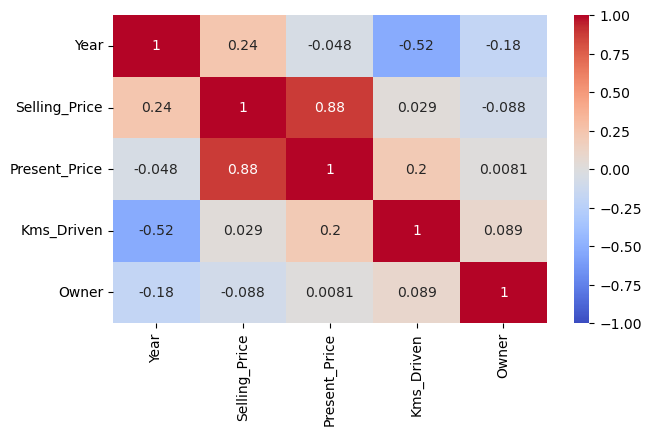

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

In [10]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
df["vehicle_age"] = 2022 - df.Year

In [12]:
df.Car_Name.value_counts().head(10)

Car_Name
city             26
corolla altis    16
verna            14
fortuner         11
brio             10
ciaz              9
innova            9
i20               9
grand i10         8
jazz              7
Name: count, dtype: int64

In [13]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

In [14]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


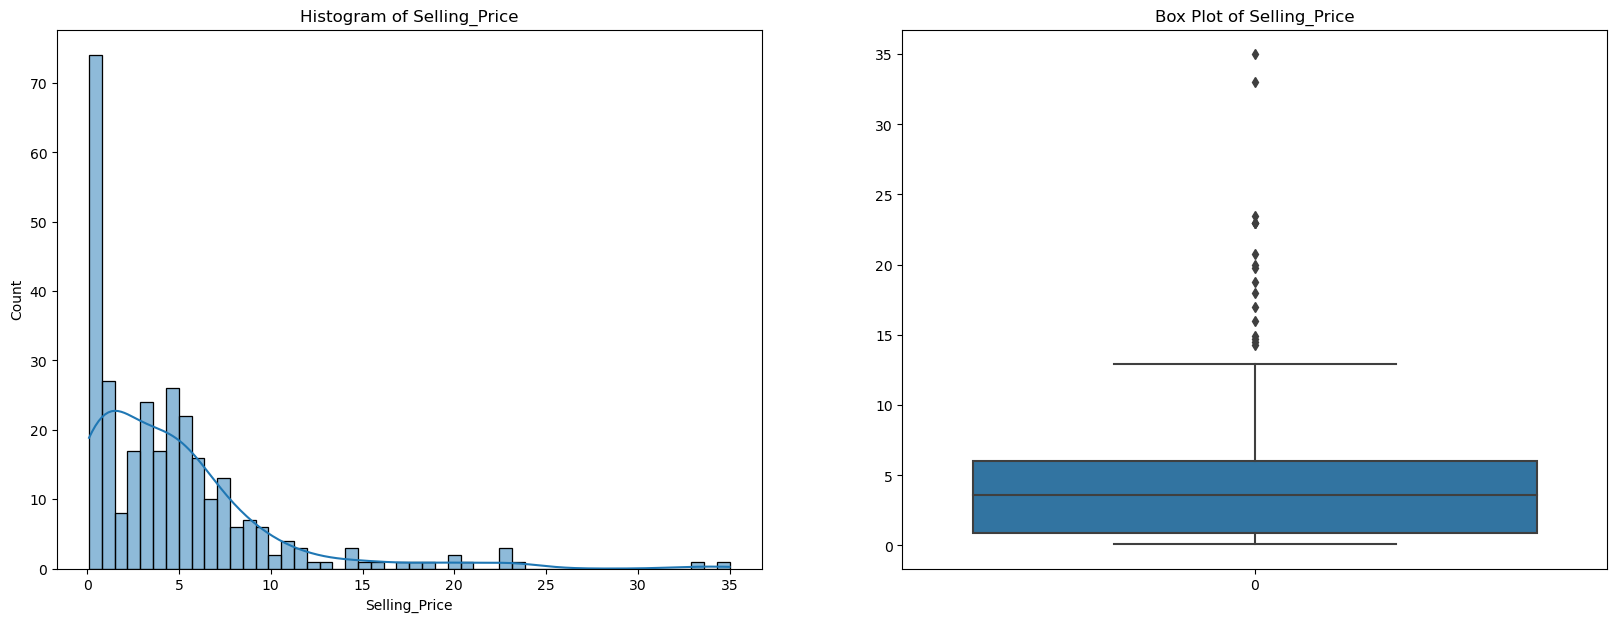

In [15]:
plt.figure(figsize=(20, 7))

plt.subplot(1, 2, 1)
plt.title("Histogram of Selling_Price")
sns.histplot(df.Selling_Price, bins=50, kde=True)
plt.subplot(1, 2, 2)
plt.title("Box Plot of Selling_Price")
sns.boxplot(df.Selling_Price);

## Train test split

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [17]:
df_new = df[df.Selling_Price < 10]
df_new.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [18]:
X = df_new.drop("Selling_Price", axis=1)
y = df_new.Selling_Price

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (218, 7)
Train target shape   :  (218,)
Test features shape  :  (55, 7)
Test target shape    :  (55,)


## Modeling with Pipeline for Adaboost Regressor

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


def train_val(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {
        "train": {
            "R2": r2_score(y_train, y_train_pred),
            "mae": mean_absolute_error(y_train, y_train_pred),
            "mse": mean_squared_error(y_train, y_train_pred, squared=True),
            "rmse": mean_squared_error(y_train, y_train_pred, squared=False),
        },
        "test": {
            "R2": r2_score(y_test, y_pred),
            "mae": mean_absolute_error(y_test, y_pred),
            "mse": mean_squared_error(y_test, y_pred, squared=True),
            "rmse": mean_squared_error(y_test, y_pred, squared=False),
        },
    }

    return pd.DataFrame(scores)

In [21]:
cat = X.select_dtypes("object").columns
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [22]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

column_trans = make_column_transformer(
    (ord_enc, cat), remainder="passthrough", verbose_feature_names_out=False
).set_output(transform="pandas")

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostRegressor

# estimator = DecisionTreeRegressor(max_depth=3)
operations = [
    ("OrdinalEncoder", column_trans),
    ("Ada_model", AdaBoostRegressor(random_state=11)),
]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# adaboostregressor algorithm uses estimator = DecisionTreeRegressor(max_depth=3) by default.

# In adaboostregressor, the predictions made by each tree are weighted and the final prediction is returned.

# For example, we give an observation to the model for prediction;
# 1st tree predicted this observation at 5;
# 2nd tree predicted 7;
# 3rd tree predicted 9.

# Let's assume that the 1st tree weighs 2, the second tree weighs 1, and the third tree weighs 0.5.

# does the calculation, taking into account the weights, as follows:
# pred = (prediction of 1st tree x weight of 1st tree + estimate of 2nd tree x 2nd tree's weight +
# 3rd tree's estimate x 3rd tree weight) / (1st tree weight + 2nd tree's weight + 3rd tree's weight) )
# (5x2 + 7x1 + 9x0.5) / (2 + 1 + 0.5) = 6.14

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('Ada_model', AdaBoostRegressor(random_state=11))])

#### If you're not using pipelines:
```python
# base_estimator = DecisionTreeRegressor(max_depth=3)
ada_model = AdaBoostRegressor(random_state=101)
ada_model.fit(X_train, y_train)
```

In [24]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.963733,0.946141
mae,0.397661,0.436586
mse,0.261686,0.367964
rmse,0.511553,0.606600


In [25]:
y_pred_ada = pipe_model.predict(X_test)
y_pred_ada

array([0.56875   , 5.4296875 , 5.35909091, 0.56875   , 6.95478873,
       0.56875   , 3.44631579, 4.98225806, 0.7075    , 0.7075    ,
       4.98225806, 4.4262963 , 7.11851852, 4.52647059, 4.72941176,
       0.48208333, 5.625     , 4.98225806, 7.07321429, 0.53571429,
       0.56875   , 2.96036364, 4.85588235, 0.598     , 2.87096774,
       0.53571429, 1.22916667, 1.05      , 0.598     , 1.22363636,
       0.52166667, 7.0025641 , 0.56875   , 0.56875   , 4.923     ,
       0.56875   , 6.95478873, 1.4375    , 5.5862069 , 4.634     ,
       7.95220588, 4.20450704, 4.98225806, 7.02254902, 7.0025641 ,
       0.56875   , 1.22363636, 1.43      , 2.455     , 1.22916667,
       5.675     , 1.30772727, 5.3656    , 3.18461538, 3.98382353])

In [26]:
from sklearn.model_selection import cross_validate

operations = [
    ("OrdinalEncoder", column_trans),
    ("Ada_model", AdaBoostRegressor(random_state=101)),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model,
    X_train,
    y_train,
    scoring=[
        "r2",
        "neg_mean_absolute_error",
        "neg_mean_squared_error",
        "neg_root_mean_squared_error",
    ],
    cv=10,
    return_train_score=True,
)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                              0.917422
train_r2                             0.963272
test_neg_mean_absolute_error        -0.520943
train_neg_mean_absolute_error       -0.393707
test_neg_mean_squared_error         -0.540584
train_neg_mean_squared_error        -0.265154
test_neg_root_mean_squared_error    -0.714772
train_neg_root_mean_squared_error   -0.513041
dtype: float64

## Gridsearch for Adaboosting

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [30]:
param_grid = {
    "Ada_model__n_estimators": [50, 150],
    "Ada_model__learning_rate": [0.1, 0.5, 0.8, 1],
    "Ada_model__loss": ["linear", "square"],
}

# Unlike classification, for regression the estimator=DecisionTreeRegressor(max_depth=3). (In classification max_depth=1)
# loss specifies the function to be used for calculating tree weights. Its default is linear.
# The best loss function should be found out with Gridsearch.
# For the division condition of leaves, gini in classification and mse in regression are used.

In [37]:
base_estimator = DecisionTreeRegressor(max_depth=2)

operations = [
    ("OrdinalEncoder", column_trans),
    ("Ada_model", AdaBoostRegressor(estimator=base_estimator, random_state=101)),
]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

# we can also tweak the hyperparameters of the estimator if we want.
# Here we adjusted the estimator hyperparameter as max_depth=2 to see how the scores are affected.
# Here we can see that the scores are slightly worse.

In [38]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('Ada_model',
                                        AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=2),
                                                          random_state=101))]),
             n_jobs=-1,
             param_grid={'Ada_model__learning_rate': [0.1, 0.5, 0.8, 1],
                         'Ada_model__loss': ['linear', 'square'],
                         'Ada_model__n_estimators': [50, 150]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [39]:
grid_model.best_params_

{'Ada_model__learning_rate': 1,
 'Ada_model__loss': 'square',
 'Ada_model__n_estimators': 150}

In [40]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('Ada_model',
                 AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=2),
                                   learning_rate=1, loss='square',
                                   n_estimators=150, random_state=101))])

In [41]:
pd.DataFrame(grid_model.cv_results_).loc[
    grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    -0.757951
mean_train_score   -0.702549
Name: 15, dtype: object

In [42]:
prediction = grid_model.predict(X_test)

ada_rmse = mean_squared_error(y_test, prediction, squared=False)


train_val(grid_model, X_train, y_train, X_test, y_test)

# CV and test set rmse scores are very consistent.

,train,test
R2,0.930344,0.911112
mae,0.544146,0.574516
mse,0.502608,0.607285
rmse,0.708949,0.779285


## Feature importance

In [43]:
operations = [
    ("OrdinalEncoder", column_trans),
    ("Ada_model", AdaBoostRegressor(loss="square", n_estimators=150, random_state=101)),
]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('Ada_model',
                 AdaBoostRegressor(loss='square', n_estimators=150,
                                   random_state=101))])

In [44]:
pipe_model["Ada_model"].feature_importances_

array([7.80201889e-02, 6.54214506e-03, 6.37254754e-03, 5.31516134e-01,
       1.17620318e-01, 6.92410182e-05, 2.59859425e-01])

In [45]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['Fuel_Type', 'Seller_Type', 'Transmission', 'Present_Price',
       'Kms_Driven', 'Owner', 'vehicle_age'], dtype=object)

In [46]:
imp_feats = pd.DataFrame(
    data=pipe_model["Ada_model"].feature_importances_,
    columns=["ada_Importance"],
    index=features,
)

ada_imp_feats = imp_feats.sort_values("ada_Importance", ascending=False)
ada_imp_feats

,ada_Importance
Present_Price,0.531516
vehicle_age,0.259859
Kms_Driven,0.117620
Fuel_Type,0.078020
Seller_Type,0.006542
Transmission,0.006373
Owner,0.000069


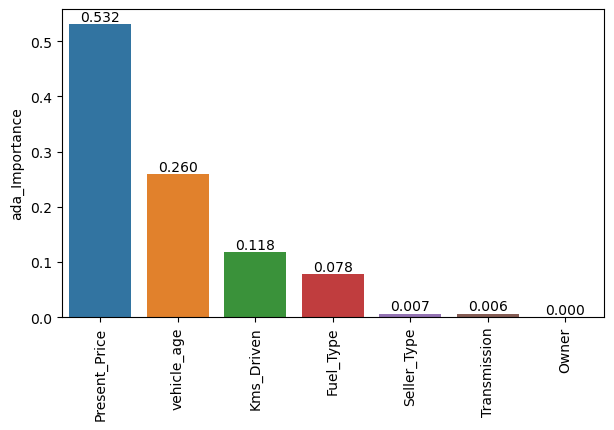

In [47]:
ax = sns.barplot(data=ada_imp_feats, x=ada_imp_feats.index, y="ada_Importance")

ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90);

## Modeling with Pipeline for Gradient Boosting Regressor

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

operations = [
    ("OrdinalEncoder", column_trans),
    ("GB_model", GradientBoostingRegressor(random_state=101)),
]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('GB_model', GradientBoostingRegressor(random_state=101))])

In [49]:
# 100 -- 150 -- (-50) -- (-30) --> 150 + 0.1 *(-50) + 0.1*(-30)

# 200 -- 150 -- (50) -- (25) --> 150 + 0.1 *50 + 0.1*25

# In regression problems, the average of all observations in the data is taken.
# Using the loss function, the negative gradients of the loss function is calculated.
# All subsequent tree then tries to predict the negative gradient of the previous tree.

# As in classification, the residual value calculated for each tree will be multiplied by
# the learning rate and added to the initial value to make an estimate.

# Suppose I have 2 instances in my data in the above example. Let's say the first car is 100$
# and the second car is 200$. The average value of all cars will be the starting value of the cars.
# And the values found in each tree will be added to this starting value.

In [50]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.992788,0.952247
mae,0.165700,0.353392
mse,0.052040,0.326246
rmse,0.228124,0.571180


In [51]:
operations = [
    ("OrdinalEncoder", column_trans),
    ("GB_model", GradientBoostingRegressor(random_state=101)),
]

model = Pipeline(steps=operations)
scores = cross_validate(
    model,
    X_train,
    y_train,
    scoring=[
        "r2",
        "neg_mean_absolute_error",
        "neg_mean_squared_error",
        "neg_root_mean_squared_error",
    ],
    cv=10,
    return_train_score=True,
)

pd.DataFrame(scores).mean()[2:]

test_r2                              0.948530
train_r2                             0.993220
test_neg_mean_absolute_error        -0.392116
train_neg_mean_absolute_error       -0.158545
test_neg_mean_squared_error         -0.336418
train_neg_mean_squared_error        -0.048881
test_neg_root_mean_squared_error    -0.561606
train_neg_root_mean_squared_error   -0.220971
dtype: float64

## Gridsearch for Gradientboosting

In [90]:
param_grid = {
    "GB_model__n_estimators": range(70, 170, 10),
    "GB_model__subsample": [0.5, 0.8, 1],
    "GB_model__max_features": [3, 4, 5, 6],
    "GB_model__learning_rate": [0.02, 0.045],
    "GB_model__max_depth": [1, 2, 3],
    "GB_model__min_samples_split": [2, 4, 6],
    "GB_model__min_samples_leaf": [1, 2, 3],
}

# The most important difference from classification is loss='squared_error'. In classifciation it was logloss.

In [91]:
operations = [
    ("OrdinalEncoder", column_trans),
    ("GB_model", GradientBoostingRegressor(random_state=101)),
]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [92]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('GB_model',
                                        GradientBoostingRegressor(random...e=101))]),
             n_jobs=-1,
             param_grid={'GB_model__learning_rate': [0.02, 0.045],
                         'GB_model__max_depth': [1, 2, 3],
                         'GB_model__max_features': [3, 4, 5, 6],
                         'GB_model__min_samples_leaf': [1, 2, 3],
                         'GB_model__min_samples_split': [2, 4, 6],
                         'GB_model__n_estimators': range(70, 170, 10),
                         'GB_model__subsample': [0.5, 0.8, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [62]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('GB_model',
                 GradientBoostingRegressor(learning_rate=0.045, max_features=6,
                                           min_samples_split=4,
                                           n_estimators=140, random_state=101,
                                           subsample=0.5))])

In [63]:
pd.DataFrame(grid_model.cv_results_).loc[
    grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score    -0.536926
mean_train_score   -0.308862
Name: 5013, dtype: object

In [64]:
prediction = grid_model.predict(X_test)

gradient_rmse = mean_squared_error(y_test, prediction, squared=False)

train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.985876,0.954324
mae,0.234011,0.353849
mse,0.101913,0.312059
rmse,0.319238,0.558623


In [65]:
operations = [
    ("OrdinalEncoder", column_trans),
    (
        "GB_model",
        GradientBoostingRegressor(
            learning_rate=0.045,
            max_features=6,
            min_samples_split=4,
            n_estimators=140,
            random_state=101,
            subsample=0.5,
        ),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model,
    X_train,
    y_train,
    scoring=[
        "r2",
        "neg_mean_absolute_error",
        "neg_mean_squared_error",
        "neg_root_mean_squared_error",
    ],
    cv=10,
    return_train_score=True,
)
pd.DataFrame(scores).mean()[2:]

test_r2                              0.953843
train_r2                             0.986761
test_neg_mean_absolute_error        -0.377346
train_neg_mean_absolute_error       -0.228309
test_neg_mean_squared_error         -0.304614
train_neg_mean_squared_error        -0.095459
test_neg_root_mean_squared_error    -0.536926
train_neg_root_mean_squared_error   -0.308862
dtype: float64

## Feature importance

In [66]:
operations = [
    ("OrdinalEncoder", column_trans),
    (
        "GB_model",
        GradientBoostingRegressor(
            learning_rate=0.045,
            max_features=6,
            min_samples_split=4,
            n_estimators=140,
            random_state=101,
            subsample=0.5,
        ),
    ),
]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('GB_model',
                 GradientBoostingRegressor(learning_rate=0.045, max_features=6,
                                           min_samples_split=4,
                                           n_estimators=140, random_state=101,
                                           subsample=0.5))])

In [67]:
pipe_model["GB_model"].feature_importances_

array([0.00850639, 0.22333279, 0.001236  , 0.60376771, 0.03997109,
       0.        , 0.12318602])

In [68]:
imp_feats = pd.DataFrame(
    data=pipe_model["GB_model"].feature_importances_,
    columns=["grad_Importance"],
    index=features,
)
grad_imp_feats = imp_feats.sort_values("grad_Importance", ascending=False)
grad_imp_feats

,grad_Importance
Present_Price,0.603768
Seller_Type,0.223333
vehicle_age,0.123186
Kms_Driven,0.039971
Fuel_Type,0.008506
Transmission,0.001236
Owner,0.000000


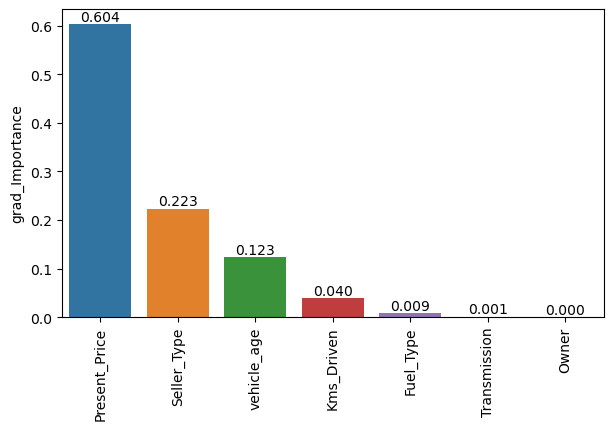

In [69]:
ax = sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y="grad_Importance")

ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90);

## Modeling with Pipeline for XG Boost Regressor

In [70]:
import xgboost as xgb

xgb.__version__

'1.7.4'

In [71]:
from xgboost import XGBRegressor

operations = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBRegressor(random_state=101)),
]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# In classification it is objective='binary:logistic' and in regression it is 'reg:squarederror'.
# Other parameters are the same as classification.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              col...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=101, ...))])

#### If you dont want to use pipelines:
```python
xgb_model = XGBRegressor(random_state=101)
xgb_model.fit(X_train, y_train)
```

In [72]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.999995,0.951623
mae,0.003799,0.362840
mse,0.000035,0.330514
rmse,0.005921,0.574903


In [73]:
operations = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBRegressor(random_state=101)),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model,
    X_train,
    y_train,
    scoring=[
        "r2",
        "neg_mean_absolute_error",
        "neg_mean_squared_error",
        "neg_root_mean_squared_error",
    ],
    cv=10,
    return_train_score=True,
)
pd.DataFrame(scores).iloc[:, 2:].mean()

# Looks to be overfitting a little.

test_r2                              0.937436
train_r2                             0.999998
test_neg_mean_absolute_error        -0.429135
train_neg_mean_absolute_error       -0.002617
test_neg_mean_squared_error         -0.417644
train_neg_mean_squared_error        -0.000015
test_neg_root_mean_squared_error    -0.625740
train_neg_root_mean_squared_error   -0.003834
dtype: float64

## Gridsearch for XGBoost

In [74]:
param_grid = {
    "XGB_model__n_estimators": [30, 35],
    "XGB_model__max_depth": [2, 3],
    "XGB_model__learning_rate": [0.055, 0.06],
    "XGB_model__subsample": [0.5, 0.8],
    "XGB_model__colsample_bytree": [0.5, 0.8, 1],
    "XGB_model__colsample_bylevel": [0.5, 0.8, 1],
}

In [75]:
operations = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBRegressor(random_state=101)),
]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [76]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('XGB_model',
                                        XGBRegressor(base_score=None,
                                                     bo...
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bylevel': [0.5, 0.8, 1],
                         'XGB_model__colsample_bytree': [0.5, 0.8, 1],
                         'XGB_model__learning_rate': [0.055, 0.06],
                         'XGB_model__max_depth': [2, 3],
                         'XGB_model__n_estimators': [30, 35],
                         'XGB_model__subsample': [0.5, 0.8]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [77]:
grid_model.best_params_

{'XGB_model__colsample_bylevel': 1,
 'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.06,
 'XGB_model__max_depth': 3,
 'XGB_model__n_estimators': 35,
 'XGB_model__subsample': 0.5}

In [78]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              col...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.06,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=35,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=101, ...))])

In [79]:
pd.DataFrame(grid_model.cv_results_).loc[
    grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

# no overfiting. Might be underfitting?

mean_test_score    -0.887809
mean_train_score   -0.800187
Name: 142, dtype: object

In [82]:
prediction = grid_model.predict(X_test)

xgb_rmse = mean_squared_error(y_test, prediction, squared=False)

train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.914400,0.928814
mae,0.494204,0.491760
mse,0.617648,0.486346
rmse,0.785906,0.697385


## Feature importance

In [83]:
operations = [
    ("OrdinalEncoder", column_trans),
    (
        "XGB_model",
        XGBRegressor(
            n_estimators=35,
            learning_rate=0.06,
            max_depth=3,
            subsample=0.5,
            random_state=101,
        ),
    ),
]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('XGB_model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              col...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.06,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=35,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=101, ...))])

In [84]:
pipe_model["XGB_model"].feature_importances_

array([0.08241928, 0.20628503, 0.0428144 , 0.5046993 , 0.05548925,
       0.        , 0.10829264], dtype=float32)

In [85]:
features

array(['Fuel_Type', 'Seller_Type', 'Transmission', 'Present_Price',
       'Kms_Driven', 'Owner', 'vehicle_age'], dtype=object)

In [86]:
imp_feats = pd.DataFrame(
    data=pipe_model["XGB_model"].feature_importances_,
    columns=["xgb_Importance"],
    index=features,
)

xgb_imp_feats = imp_feats.sort_values("xgb_Importance", ascending=False)
xgb_imp_feats

,xgb_Importance
Present_Price,0.504699
Seller_Type,0.206285
vehicle_age,0.108293
Fuel_Type,0.082419
Kms_Driven,0.055489
Transmission,0.042814
Owner,0.000000


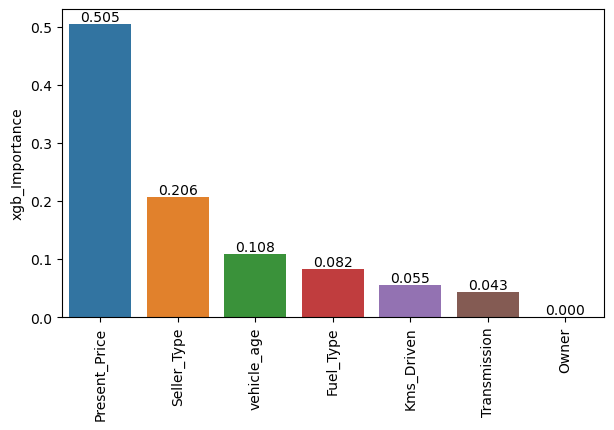

In [87]:
ax = sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index, y="xgb_Importance")

ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90);

## Feature importance comparison

In [88]:
pd.concat([xgb_imp_feats, grad_imp_feats, ada_imp_feats], axis=1)

,xgb_Importance,grad_Importance,ada_Importance
Present_Price,0.504699,0.603768,0.531516
Seller_Type,0.206285,0.223333,0.006542
vehicle_age,0.108293,0.123186,0.259859
Fuel_Type,0.082419,0.008506,0.078020
Kms_Driven,0.055489,0.039971,0.117620
Transmission,0.042814,0.001236,0.006373
Owner,0.000000,0.000000,0.000069


## compare scores

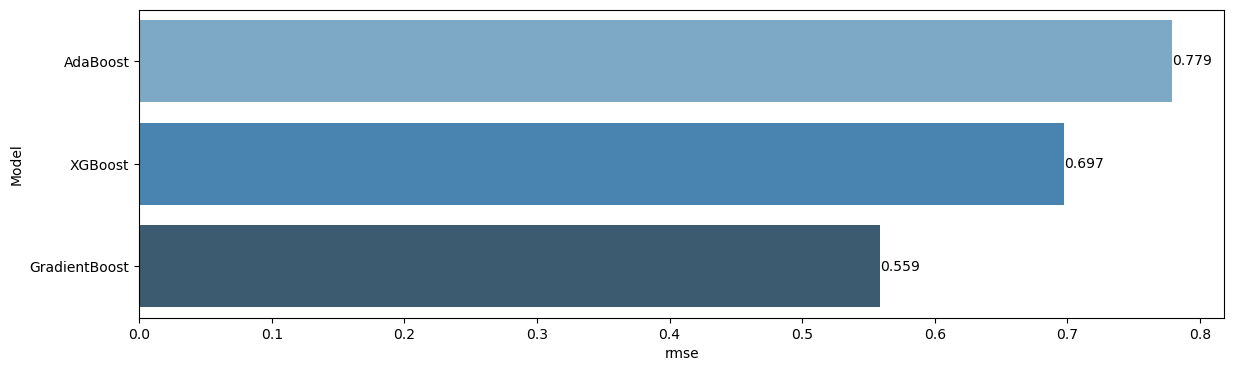

In [89]:
compare = pd.DataFrame(
    {
        "Model": ["AdaBoost", "GradientBoost", "XGBoost"],
        "rmse": [ada_rmse, gradient_rmse, xgb_rmse],
    }
)

plt.figure(figsize=(14, 4))

compare = compare.sort_values(by="rmse", ascending=False)
ax = sns.barplot(x="rmse", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

## Final Model

In [ ]:
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer

ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

column_trans = make_column_transformer(
    (ord_enc, cat), remainder="passthrough", verbose_feature_names_out=False
).set_output(transform="pandas")


operations = [
    ("OrdinalEncoder", column_trans),
    (
        "Gb_model",
        GradientBoostingRegressor(
            learning_rate=0.045,
            max_features=6,
            min_samples_split=4,
            n_estimators=140,
            random_state=101,
            subsample=0.5,
        ),
    ),
]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('Gb_model',
                 GradientBoostingRegressor(learning_rate=0.045, max_features=6,
                                           min_samples_split=4,
                                           n_estimators=140, random_state=101,
                                           subsample=0.5))])

In [94]:
pipe_model["OrdinalEncoder"].fit_transform(X).head()

,Fuel_Type,Seller_Type,Transmission,Present_Price,Kms_Driven,Owner,vehicle_age
0,2.0,0.0,1.0,5.59,27000,0,8
1,1.0,0.0,1.0,9.54,43000,0,9
2,2.0,0.0,1.0,9.85,6900,0,5
3,2.0,0.0,1.0,4.15,5200,0,11
4,1.0,0.0,1.0,6.87,42450,0,8


## Prediction

In [95]:
samples = {
    "Present_Price": [7, 9.5],
    "Kms_Driven": [25000, 44000],
    "Fuel_Type": ["Petrol", "Diesel"],
    "Seller_Type": ["Dealer", "Individual"],
    "Transmission": ["Manual", "Automatic"],
    "Owner": [0, 1],
    "vehicle_age": [1, 9],
}

In [96]:
df_samples = pd.DataFrame(samples)
df_samples

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,7.0,25000,Petrol,Dealer,Manual,0,1
1,9.5,44000,Diesel,Individual,Automatic,1,9


In [97]:
pipe_model.predict(df_samples)

array([5.28306382, 5.28487518])